<h1>Neural Networks in Scikit-learn</h1>

<h3>Creating Artificial Dataset</h3>

<p>
    To help us understand how models work before we apply them to messy real world data, scikit-learn offers us a way to create an <strong>artificial dataset</strong> with the desired size and complexity.
</p>

<p>
   We can use <strong>make_classification</strong> function in scikit-learn. It generates a feature matrix (X) and target array (y) given these parameters: 
</p>
<ul>
    <li>n_samples: number of datapoints</li>
    <li>n_features: number of features</li>
    <li>n_informative: number of informative features</li>
    <li>n_redundant: number of redundant features</li>
    <li>random_state: random state to guarantee same result every time</li>
</ul>

In [1]:
from sklearn.datasets import make_classification

# The default number of generated rows/samples is 100 so we don't need to specify it in the function call.
X, y = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=2, 
    random_state=3
)

print(X)
print(y)

[[ 1.29619246 -1.19338286]
 [ 0.76455807 -2.44539487]
 [-0.56135339  1.44773498]
 [ 0.09018381 -0.21892726]
 [ 3.20977007 -1.03881206]
 [ 0.80001485 -1.66246266]
 [ 0.88468364 -0.41310735]
 [ 1.44727831  0.57410216]
 [ 0.17890668  1.6394023 ]
 [-0.58100008  0.33584532]
 [-0.40007267  2.04119894]
 [ 0.86736895 -2.33598454]
 [ 2.57067557 -0.2757088 ]
 [-0.50604244  0.36615269]
 [ 0.58326712  1.22009748]
 [ 2.35993321 -0.12424544]
 [-0.25023328  0.0491287 ]
 [ 1.54520785  0.55053486]
 [-0.12132899 -0.58306026]
 [ 1.93823769  0.08503077]
 [ 0.26842648 -0.03321614]
 [ 1.28259341 -0.6052909 ]
 [-1.24399007  0.44172354]
 [-0.33252253 -0.4085363 ]
 [-0.25906554  2.1460918 ]
 [-2.04183382  1.62989998]
 [ 0.75356541  0.74284632]
 [ 0.74494799 -1.69867877]
 [-2.08503765  1.69398556]
 [ 0.64755294  1.35713573]
 [ 1.36023958 -0.42680268]
 [-1.20002643  1.52879135]
 [-1.16926167 -2.94592209]
 [ 1.50713573  0.49784377]
 [-0.86717188  0.44292896]
 [-0.65100851 -0.18139162]
 [-0.61231169  1.9581328 ]
 

<p>And below we plot the generated demo data for visual examination</p>

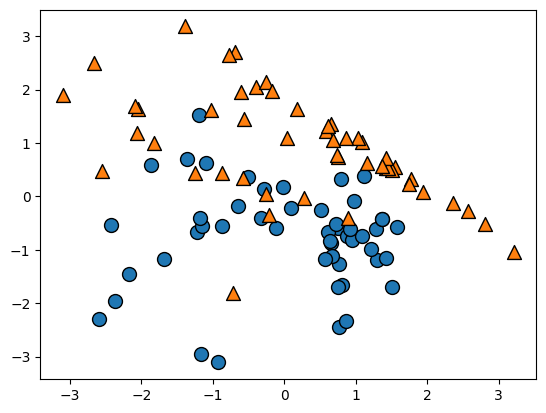

In [2]:
from matplotlib import pyplot as plt

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=100, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=100, edgecolors='k', marker='^')
plt.show()

<p>
    Scikit-learn offers several functions to create more artificial datasets to experiment with such as <strong>make_circles</strong> and <strong>make_moons</strong>.
</p>

<h3></h3>

<p>Scikit-learn has an MLPClassifier class which is a multi-layer perceptron for classification. It can be imported and trained/fitted as shown below</p>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\MOHAMMEDG\Anaconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

<p>
    Notice that we got a ConvergenceWarning which means that the neural network needs more iterations to converge on the optimal coefficients.<br/>The default number of iterations is 200, so we can try to increase this value to 1000.
</p>

In [4]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

<p>Now we use the score method to calculate the accuracy on the test set.</p>

In [5]:
print("Neural Network(Multi-Perceptron Classifier) Accuracy:", mlp.score(X_test, y_test))

Neural Network(Multi-Perceptron Classifier) Accuracy: 0.64


<h3>Parameters for MLPClassifier</h3>

<p>There are a couple of parameters that you may find yourself needing to change in the MLPClassifier.</p>
<p>You can configure</p>
<ul>
    <li><strong>hidden layers</strong>: The default MLPClassifier will have a single hidden layer of 100 nodes.</li>
    <li>how many <strong>nodes</strong>  in each layer: The default is 100 nodes</li>
    <li>
        <strong>max_iter</strong>: This is the number of iterations. In general, the more data you have, the fewer iterations you need to converge.<br/>
        However, If the value is too large, it will take too long to run the code.<br/>
        If the value is too small, the neural network will not converge on the optimal solution.
    </li>
    <li>
        <strong>alpha</strong>: This is the step size that specifies how much the neural network changes the coefficients at each iteration.<br/>
        However, If the value is too small, you may never converge on the optimal solution.<br/>
        If the value is too large, you may miss the optimal solution.<br/>
        Initially you can leave this at the default value which is 0.0001.<br/>
        But do note that decreasing alpha often requires an increase in <strong>max_iter</strong>.
    </li>
    <li>
        <strong>solver</strong>: This is what algorithm is used to find the optimal solution.<br/>
        All the solvers will work, but you may find for your dataset that a different solver finds the optimal solution faster.<br/>
        The options for solver are 'lbfgs', 'sgd' and 'adam'.
    </li>
</ul>

<p>
    The default parameters often works really well, but we can experiment with different values.<br/>
    Below we create an MLPCLassifier with:
</p>
<ul>
    <li>Two hidden layers, one of 100 nodes and one of 50 nodes.</li>
    <li>Set the max_iter to 1000</li>
    <li>Leave the alpha at the default value of 0.0001 but specifying it in the call to be noticed</li>
    <li>Choosing the 'adam' solver</li>
    <li>Having a random_state seed to get the same result each time we run the code</li>
</ul>

In [6]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50), alpha=0.0001, solver='adam', random_state=3)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


<strong>You can read about several more parameters that you can tune in the neural network in the online documentation of scikit-learn.</strong>